#  Movie Recommendation System


The rapid growth of data collection has led to a new era of information. Data is being used to create more efficient systems and this is where Recommendation Systems come into play. Recommendation Systems are a type of information filtering systems as they improve the quality of search results and provides items that are more relevant to the search item or are realted to the search history of the user.

They are used to predict the rating or preference that a user would give to an item. Almost every major tech company has applied them in some form or the other: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and Facebook uses it to recommend pages to like and people to follow. Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

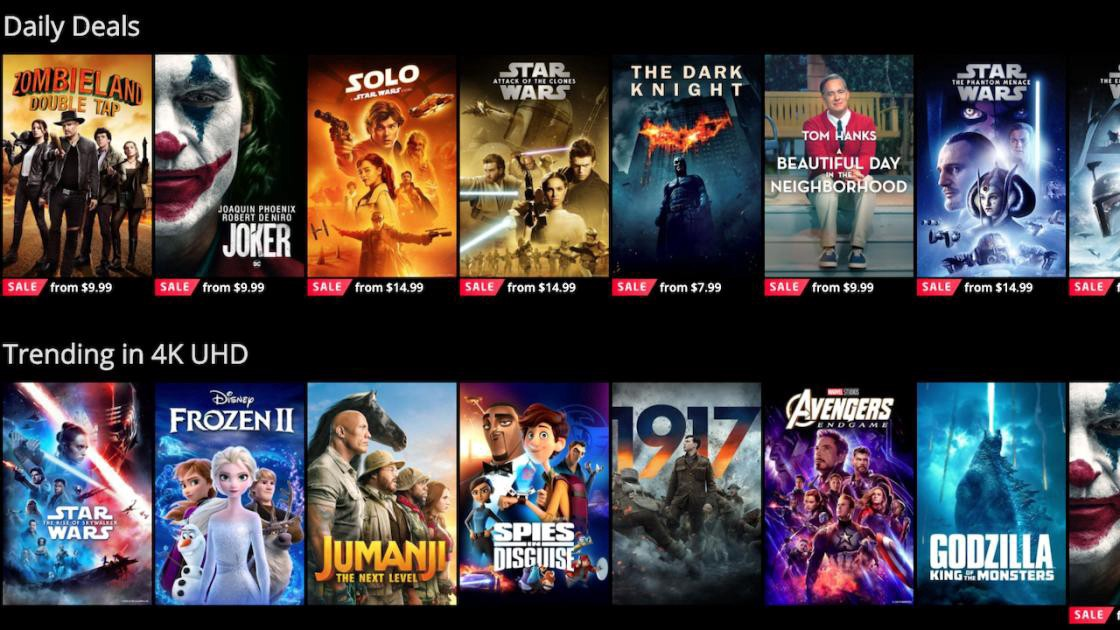

## Types of recommender systems

There are three main types of recommendation systems.

### 1. Collaborative Filtering

The collaborative filtering method is based on gathering and analyzing data on user’s behavior. This includes the user’s online activities and predicting what they will like based on the similarity with other users.

### 2.Content Based Filtering
They suggest similar items based on a particular item. This system uses item metadata, such as genre, director, description, actors, etc. for movies, to make these recommendations. The general idea behind these recommender systems is that if a person liked a particular item, he or she will also like an item that is similar to it.

### 3. Hybrid Recommendation Systems
In hybrid recommendation systems, products are recommended using both content-based and collaborative filtering simultaneously to suggest a broader range of products to customers. This recommendation system is up-and-coming and is said to provide more accurate recommendations than other recommender systems.

In our notebook, we will use content based filtering to build a recommendation system.

We will use **TMDB 5000 Movie Dataset** which you can find it [here.](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata/download)

In [1]:
# Importing Dependencies


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
# Loading the data

movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [3]:
# Checking the shape

movies.shape

(4803, 20)

In [4]:
# Checking the datatypes and null/non-null distribution

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
# Checking the shape

credits.shape

(4803, 4)

In [6]:
# Checking the datatypes and null/non-null distribution

credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
# Let's join the two dataset on the 'title' column

movies = movies.merge(credits,on='title')

In [8]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


For content based movie recommeder system, the important features are as follows:
1. genres
2. title
3. overview
4. keywords
5. cast
6. crew
7. movie_id (for tracking purpose)

let's build a new dataframe.

In [9]:
# New dataframe

df1 = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [10]:
df1.head(1)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [11]:
# Checking the shape

df1.shape

(4809, 7)

In [12]:
# Checking for null values

df1.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
# Dropping rows with null values

df2 = df1.dropna()

In [14]:
# Checking for null values

df2.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [15]:
# Checking the shape

df2.shape

(4806, 7)

Now data stored in distonary in genres, keywords, cast and crew columns and we need specific information from these columns. like,from 
1. genres: we need keywords type of genre like action, drama, etc.
2. keywords: values associated with key 'name'
3. cast: We will take top 3 cast of the movie
4. crew: We will consider only director of the movie

In [16]:
# Creating a helper function for columns genres and keywords to collect a list of important keywords

import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):   # To convert string into dict
        L.append(i['name']) 
    return L 


df3 = df2.copy()

In [17]:
# Assigning a list of genres in df3 genres column 

df3['genres'] = df2['genres'].apply(convert)
df3.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [18]:
# Assigning a list of important keywords in df3 keywords column 

df3['keywords'] = df2['keywords'].apply(convert)
df3.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
# Creating a helper function for column cast to collect a list of top three cast

def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [20]:
# Assigning a  list of top three casts to df3 cast column 

df3['cast'] = df2['cast'].apply(convert3)
df3.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [21]:
# Creating a helper function for column crew to fetch director name

def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [22]:
# Assinging director name to crew column in df3 

df3['crew'] = df2['crew'].apply(fetch_director)

In [23]:
#movies['overview'] = movies['overview'].apply(lambda x:x.split())
df3.sample(5)

,movie_id,title,overview,genres,keywords,cast,crew
662,550,Fight Club,A ticking-time-bomb insomniac and a slippery s...,[Drama],"[support group, dual identity, nihilism, rage ...","[Edward Norton, Brad Pitt, Meat Loaf]",[David Fincher]
3756,8337,They Live,"Nada, a down-on-his-luck construction worker, ...","[Action, Horror, Science Fiction, Thriller]","[dystopia, social commentary, alien invasion, ...","[Roddy Piper, Keith David, Meg Foster]",[John Carpenter]
985,241554,Run All Night,Brooklyn mobster and prolific hit man Jimmy Co...,"[Action, Crime, Drama, Mystery, Thriller]","[hitman, revenge, murder, on the run, mobster]","[Liam Neeson, Ed Harris, Joel Kinnaman]",[Jaume Collet-Serra]
75,9804,Waterworld,In a futuristic world where the polar ice caps...,"[Adventure, Action]","[ocean, tattoo, mutant, water, dystopia, dooms...","[Kevin Costner, Chaim Girafi, Rick Aviles]",[Kevin Reynolds]
3853,38007,Ira & Abby,"A neurotic, young psychology student, with low...","[Comedy, Romance]",[independent film],"[Chris Messina, Jennifer Westfeldt, David Marg...",[Robert Cary]


In [24]:
# Creating a helper function to remove whitespace from single name/keywords

def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [25]:
# Removing white spcaes

df4 = df3.copy()

df4['cast'] = df3['cast'].apply(collapse)
df4['crew'] = df3['crew'].apply(collapse)
df4['genres'] = df3['genres'].apply(collapse)
df4['keywords'] = df3['keywords'].apply(collapse)

In [26]:
df4.head()

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [27]:
# Spliting paragraph present in the overview to a words

df5 = df4.copy()

df5['overview'] = df4['overview'].apply(lambda x:x.split())

In [28]:
# Collecting all the important words from column overview, genres, cast, crew in the column tags

df5['tags'] = df5['overview'] + df5['genres'] + df5['keywords'] + df5['cast'] + df5['crew']

In [29]:
# Creating a new dataframe that consists of 3 columns : movie_id, title, and tags

df6 = df5.drop(columns=['overview','genres','keywords','cast','crew'])
df6['tags'] = df6['tags'].apply(lambda x: " ".join(x))

In [30]:
#Checking final dataframe

df6.head()

,movie_id,title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


## CountVectorizer

CountVectorizer is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text. This is helpful when we have multiple such texts, and we wish to convert each word in each text into vectors (for using in further text analysis).

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample. 

In [31]:
# Importing CountVectorizer and creating a object of it that will create of space of 5000 dimension which represent reapeating english words.

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [32]:
# Fitting a object of it that will create of space of 5000 dimension which represent reapeating english words present under 
# tags column and convert it to numpy array 

vector = cv.fit_transform(df6['tags']).toarray()

In [33]:
# Checking most repeated 5000 words under tags column

cv.get_feature_names()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1930s',
 '1940s',
 '1944',
 '1950',
 '1950s',
 '1960s',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1980s',
 '1985',
 '1990s',
 '1999',
 '19th',
 '19thcentury',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '60s',
 '70',
 'aaron',
 'aaroneckhart',
 'abandoned',
 'abducted',
 'abigailbreslin',
 'abilities',
 'ability',
 'able',
 'aboard',
 'abuse',
 'abusive',
 'academic',
 'academy',
 'accept',
 'accepted',
 'accepts',
 'access',
 'accident',
 'accidental',
 'accidentally',
 'accompanied',
 'accomplish',
 'account',
 'accountant',
 'accused',
 'ace',
 'achieve',
 'act',
 'acting',
 'action',
 'actionhero',
 'actions',
 'activist',
 'activities',
 'activity',
 'actor',
 'actors',
 'actress',
 'acts',
 'actual',
 'actually',
 'adam',
 'adams',
 'adamsandler',
 'adamshankman',
 'adaptation',
 'adapted',
 'addict',
 'addi

In [34]:
# Checking the shape

vector.shape

(4806, 5000)

## Cosine Similarity
similarity measure refers to distance with dimensions representing features of the data object, in a dataset. If this distance is less, there will be a high degree of similarity, but when the distance is large, there will be a low degree of similarity.

Cosine similarity is a metric, helpful in determining, how similar the data objects are irrespective of their size. We can measure the similarity between two sentences in Python using cosine_similarity. In cosine similarity, data objects in a dataset are treated as a vector. The formula to find the cosine similarity between two vectors is –

Cos(x, y) = x . y / ||x|| * ||y||

In [35]:
# Importing cosine_similarity 

from sklearn.metrics.pairwise import cosine_similarity

In [36]:
# Creating a object of cosine_similarity that will measures similarity between vector 

similarity = cosine_similarity(vector)

In [37]:
# Checking similary np array

similarity

array([[1.        , 0.08964215, 0.06071767, ..., 0.02519763, 0.0277885 ,
        0.        ],
       [0.08964215, 1.        , 0.06350006, ..., 0.02635231, 0.        ,
        0.        ],
       [0.06071767, 0.06350006, 1.        , ..., 0.02677398, 0.        ,
        0.        ],
       ...,
       [0.02519763, 0.02635231, 0.02677398, ..., 1.        , 0.07352146,
        0.04774099],
       [0.0277885 , 0.        , 0.        , ..., 0.07352146, 1.        ,
        0.05264981],
       [0.        , 0.        , 0.        , ..., 0.04774099, 0.05264981,
        1.        ]])

In [38]:
# Checking the shape of similarity array which we be of size [number_of_movies * number_of_movies]

similarity.shape

(4806, 4806)

## Top five recommendations

In [39]:
# Creating a function to recommend five most similar movies

def recommend(movie):
    
    # finding movie index from its title provided by user
    index = df6[df6['title'] == movie].index[0]                                             
    
    # Using  enumerate function to track movie index
    # sorting in descending order on the basis of similarity using lambada function
    
    sorted_movie_similarity_score = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])    
    
    # Finding out title for five most similar movies using their indices
    for i in sorted_movie_similarity_score[1:6]:
        print(df6.iloc[i[0]].title)

## Saving a Similarity score

In [40]:
# Importing Pickel library 

import pickle

In [41]:
# Saving movie final dataframe and similarity score np array as a  file

pickle.dump(df6,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))